In [105]:
import pandas as pd
import shutil
import re 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

annotations_dir = "../Emotify/data.csv"

songs_dir = "../Emotify/emotifymusic"

classic_songs_dir = f"{songs_dir}/classical"
electronic_songs_dir = f"{songs_dir}/electronic"
pop_songs_dir = f"{songs_dir}/pop"
rock_songs_dir = f"{songs_dir}/rock"

target_dir = "../Quadrant Songs Library/"

q1_cl_dir = f"{target_dir}/Q1/Classical"
q2_cl_dir = f"{target_dir}/Q2/Classical"
q3_cl_dir = f"{target_dir}/Q3/Classical"
q4_cl_dir = f"{target_dir}/Q4/Classical"
n_cl_dir = f"{target_dir}/N/Classical"

q1_md_dir = f"{target_dir}/Q1/Modern"
q2_md_dir = f"{target_dir}/Q2/Modern"
q3_md_dir = f"{target_dir}/Q3/Modern"
q4_md_dir = f"{target_dir}/Q4/Modern"
n_md_dir = f"{target_dir}/N/Modern"

In [106]:
df_annotations = pd.read_csv(annotations_dir)
df_annotations.head()

,track id,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood,liked,disliked,age,gender,mother tongue
0,1,classical,0,1,0,0,0,0,1,1,0,3,1,0,21,1,English
1,1,classical,0,0,0,1,0,0,0,0,0,3,0,1,41,1,Dutch
2,1,classical,0,0,0,1,0,0,0,0,1,3,0,0,24,1,English
3,1,classical,0,0,0,0,1,0,0,0,0,3,0,0,32,0,Spanish
4,1,classical,0,0,0,1,1,0,0,0,0,4,0,1,21,0,English


In [107]:
df_annotations = df_annotations.drop([" liked", " disliked", " age", " gender", " mother tongue"], axis=1)
df_annotations.head()

,track id,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood
0,1,classical,0,1,0,0,0,0,1,1,0,3
1,1,classical,0,0,0,1,0,0,0,0,0,3
2,1,classical,0,0,0,1,0,0,0,0,1,3
3,1,classical,0,0,0,0,1,0,0,0,0,3
4,1,classical,0,0,0,1,1,0,0,0,0,4


In [108]:
df_mean_annotations = df_annotations.groupby(['track id', ' genre']).mean()
df_mean_annotations = df_mean_annotations.reset_index()
df_mean_annotations
df_mean_annotations.head(20)

,track id,genre,amazement,solemnity,tenderness,nostalgia,calmness,power,joyful_activation,tension,sadness,mood
0,1,classical,0.145833,0.333333,0.208333,0.291667,0.625000,0.020833,0.083333,0.062500,0.312500,3.437500
1,2,classical,0.106383,0.170213,0.425532,0.340426,0.744681,0.042553,0.021277,0.021277,0.106383,3.595745
2,3,classical,0.173913,0.347826,0.130435,0.173913,0.065217,0.282609,0.413043,0.239130,0.152174,3.739130
3,4,classical,0.119048,0.142857,0.523810,0.452381,0.761905,0.023810,0.000000,0.023810,0.142857,3.761905
4,5,classical,0.045455,0.295455,0.318182,0.522727,0.318182,0.045455,0.068182,0.181818,0.318182,3.840909
5,6,classical,0.106383,0.212766,0.212766,0.297872,0.553191,0.063830,0.234043,0.127660,0.127660,3.744681
6,7,classical,0.340426,0.085106,0.148936,0.085106,0.106383,0.212766,0.808511,0.148936,0.021277,3.659574
7,8,classical,0.086957,0.282609,0.326087,0.304348,0.478261,0.043478,0.195652,0.152174,0.152174,3.565217
8,9,classical,0.113636,0.272727,0.318182,0.409091,0.477273,0.045455,0.068182,0.022727,0.363636,3.500000
9,10,classical,0.276596,0.212766,0.021277,0.042553,0.021277,0.510638,0.638298,0.212766,0.021277,3.680851


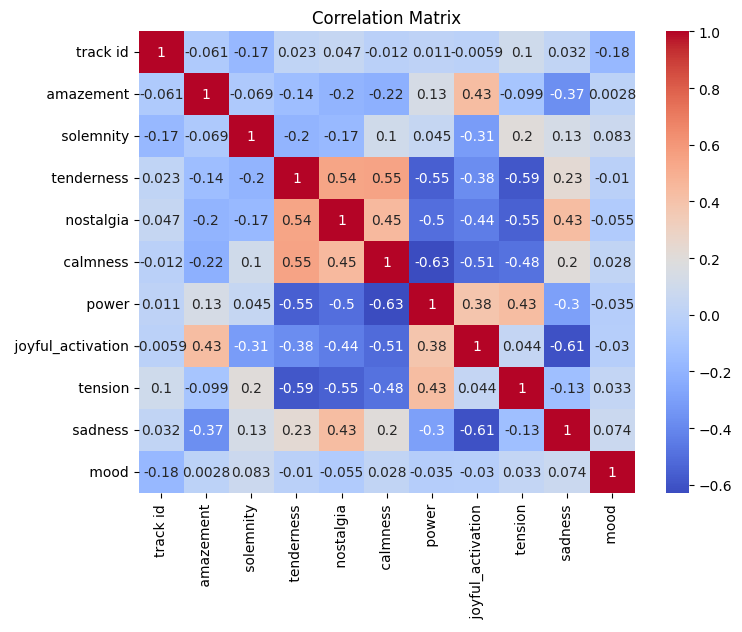

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_mean_annotations.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [110]:
df_mean_annotations["power_calm_ratio"] = df_mean_annotations[" power"] / df_mean_annotations[" calmness"]
df_mean_annotations["joy_sad_ratio"] = df_mean_annotations[" joyful_activation"] / df_mean_annotations[" sadness"]

In [111]:
df_ratios = df_mean_annotations[['track id', ' genre', 'power_calm_ratio', 'joy_sad_ratio']]
df_ratios.loc[df_ratios['power_calm_ratio'] > 1, 'power_calm_ratio'] = 1
df_ratios.loc[df_ratios['joy_sad_ratio'] > 1, 'joy_sad_ratio'] = 1

df_ratios.head()

C:\Users\steve\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,track id,genre,power_calm_ratio,joy_sad_ratio
0,1,classical,0.033333,0.266667
1,2,classical,0.057143,0.200000
2,3,classical,1.000000,1.000000
3,4,classical,0.031250,0.000000
4,5,classical,0.142857,0.214286


In [112]:
df_classical_ratios = df_ratios[df_ratios[' genre'] == "classical"]
df_electronic_ratios = df_ratios[df_ratios[' genre'] == "electronic"]
df_pop_ratios = df_ratios[df_ratios[' genre'] == "pop"]
df_rock_ratios = df_ratios[df_ratios[' genre'] == "rock"]

df_rock_ratios['track id'] = df_rock_ratios['track id'] % 100
df_rock_ratios.loc[df_rock_ratios['track id'] == 0, 'track id'] = 100

df_electronic_ratios['track id'] = df_electronic_ratios['track id'] % 200
df_electronic_ratios.loc[df_electronic_ratios['track id'] == 0, 'track id'] = 100

df_pop_ratios['track id'] = df_pop_ratios['track id'] % 300
df_pop_ratios.loc[df_pop_ratios['track id'] == 0, 'track id'] = 100

C:\Users\steve\AppData\Local\Temp\ipykernel_18360\486159010.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rock_ratios['track id'] = df_rock_ratios['track id'] % 100
C:\Users\steve\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\steve\AppData\Local\Temp\ipykernel_18360\486159010.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [113]:
for index, row in df_classical_ratios.iterrows():
    power_calm_ratio = row['power_calm_ratio']
    joy_sad_ratio = row['joy_sad_ratio']
    file_name = f"{row['track id']}.mp3"

    source_file_path = f"{classic_songs_dir}/{file_name}"

    if((joy_sad_ratio <= 0.65 and joy_sad_ratio >= 0.45) and (power_calm_ratio <= 0.65 and power_calm_ratio >= 0.45)):
        pasted_file_name = f"{n_cl_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)
    elif(joy_sad_ratio>=0.5 and power_calm_ratio>=0.5):
        pasted_file_name = f"{q1_cl_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)
    elif(joy_sad_ratio<0.5 and power_calm_ratio>=0.5):
        pasted_file_name = f"{q2_cl_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)
    elif(joy_sad_ratio<0.5 and power_calm_ratio<0.5):
        pasted_file_name = f"{q3_cl_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)
    elif(joy_sad_ratio>=0.5 and power_calm_ratio<0.5):
        pasted_file_name = f"{q4_cl_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)

for index, row in df_electronic_ratios.iterrows():
    power_calm_ratio = row['power_calm_ratio']
    joy_sad_ratio = row['joy_sad_ratio']
    file_name = f"{row['track id']}.mp3"

    source_file_path = f"{electronic_songs_dir}/{file_name}"

    if((joy_sad_ratio <= 0.65 and joy_sad_ratio >= 0.45) and (power_calm_ratio <= 0.65 and power_calm_ratio >= 0.45)):
        pasted_file_name = f"{n_md_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)
    elif(joy_sad_ratio>=0.5 and power_calm_ratio>=0.5):
        pasted_file_name = f"{q1_md_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)
    elif(joy_sad_ratio<0.5 and power_calm_ratio>=0.5):
        pasted_file_name = f"{q2_md_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)
    elif(joy_sad_ratio<0.5 and power_calm_ratio<0.5):
        pasted_file_name = f"{q3_md_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)
    elif(joy_sad_ratio>=0.5 and power_calm_ratio<0.5):
        pasted_file_name = f"{q4_md_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)
        
for index, row in df_rock_ratios.iterrows():
    power_calm_ratio = row['power_calm_ratio']
    joy_sad_ratio = row['joy_sad_ratio']
    file_name = f"{row['track id']}.mp3"

    source_file_path = f"{rock_songs_dir}/{file_name}"

    if((joy_sad_ratio <= 0.65 and joy_sad_ratio >= 0.45) and (power_calm_ratio <= 0.65 and power_calm_ratio >= 0.45)):
        pasted_file_name = f"{n_md_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)
    elif(joy_sad_ratio>=0.5 and power_calm_ratio>=0.5):
        pasted_file_name = f"{q1_md_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)
    elif(joy_sad_ratio<0.5 and power_calm_ratio>=0.5):
        pasted_file_name = f"{q2_md_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)
    elif(joy_sad_ratio<0.5 and power_calm_ratio<0.5):
        pasted_file_name = f"{q3_md_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)
    elif(joy_sad_ratio>=0.5 and power_calm_ratio<0.5):
        pasted_file_name = f"{q4_md_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)
        
for index, row in df_pop_ratios.iterrows():
    power_calm_ratio = row['power_calm_ratio']
    joy_sad_ratio = row['joy_sad_ratio']
    file_name = f"{row['track id']}.mp3"

    source_file_path = f"{pop_songs_dir}/{file_name}"

    if((joy_sad_ratio <= 0.65 and joy_sad_ratio >= 0.45) and (power_calm_ratio <= 0.65 and power_calm_ratio >= 0.45)):
        pasted_file_name = f"{n_md_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)
    elif(joy_sad_ratio>=0.5 and power_calm_ratio>=0.5):
        pasted_file_name = f"{q1_md_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)
    elif(joy_sad_ratio<0.5 and power_calm_ratio>=0.5):
        pasted_file_name = f"{q2_md_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)
    elif(joy_sad_ratio<0.5 and power_calm_ratio<0.5):
        pasted_file_name = f"{q3_md_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)
    elif(joy_sad_ratio>=0.5 and power_calm_ratio<0.5):
        pasted_file_name = f"{q4_md_dir}/emotify_{file_name}"
        shutil.copy(source_file_path, pasted_file_name)